In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from gcMapExplorer import lib as gmlib
import gzip
from os import path

import warnings
warnings.filterwarnings("ignore") 
import logging, sys
logging.disable(sys.maxsize)


In [10]:
data_prefix = '/data/analysis/ag-reils/ag-reils-shared/Hi-C/'

In [6]:
chromosome_list = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 'X']
chromosome_names = ["chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr1", "chr20", "chr21", "chr22", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9"]

In [361]:
chromosome_name = 'chr7'

In [392]:
for name in chromosome_list:
    print(name)
    cooReader = gmlib.importer.CooMatrixHandler(f'/data/analysis/ag-reils/ag-reils-shared/Hi-C/meeteu/www.lcqb.upmc.fr/meetu/dataforstudent/HiC/GM12878/100kb_resolution_intrachromosomal/chr{name}_100kb.RAWobserved', mapType = 'intra')
    cooReader.save_ccmaps(f'./cmap_files/intra/cmap_{name}.ccmap', xlabels=f'{name}', ylabels=f'{name}')
    del cooReader

1
  
2
  
3
  
4
  
5
  
6
  
7
  
8
  
9
  
10
  
11
  
12
  
13
  
14
  
15
  
16
  
17
  
18
  
19
  
20
  
21
  
22
  
X
  


In [4]:
chromosome_names_exp = [ 1,  2,  3,  4,  5,  6]
for chromosome_name in chromosome_names_exp:
    print(chromosome_name)
    cooReader = gmlib.importer.CooMatrixHandler(f'/data/analysis/ag-reils/ag-reils-shared/Hi-C/meeteu/www.lcqb.upmc.fr/meetu/dataforstudent/HiC/GM12878/100kb_resolution_interchromosomal/chr{chromosome_name}_7_100kb.RAWobserved', mapType = 'inter')
    cooReader.save_ccmaps(f'./cmap_files/inter/chr7/cmap_chr7_with_{chromosome_name}.ccmap', xlabels=f'{chromosome_name}', ylabels=f'chr7')
    del cooReader


1
  
2
  
3
  
4
  
5
  
6
  


In [395]:
# Dictionary with the path to each chromosom
# for chromosome_name in chromosome_names:
chromosome_name = 'chr7'
for name in chromosome_list:
    print(name)
    if path.exists(f'/data/analysis/ag-reils/ag-reils-shared/Hi-C/meeteu/www.lcqb.upmc.fr/meetu/dataforstudent/HiC/GM12878/100kb_resolution_interchromosomal/{chromosome_name}_{name}_100kb.RAWobserved'):
        cooReader = gmlib.importer.CooMatrixHandler(f'/data/analysis/ag-reils/ag-reils-shared/Hi-C/meeteu/www.lcqb.upmc.fr/meetu/dataforstudent/HiC/GM12878/100kb_resolution_interchromosomal/{chromosome_name}_{name}_100kb.RAWobserved', mapType = 'inter')
        cooReader.save_ccmaps(f'./cmap_files/inter/{chromosome_name}/cmap_{chromosome_name}_with_{name}.ccmap', xlabels=f'{chromosome_name}', ylabels=f'{name}')


1
2
3
4
5
6
7
8
  
9
  
10
  
11
  
12
  
13
  
14
  
15
  
16
  
17
  
18
  
19
  
20
  
21
  
22
  
X
  


In [87]:
avg_row_inter = []
avg_row_inter.append(['hi', chromosome_list])

In [162]:
def remove_self_interaction(A):
    A = np.asarray(A, dtype=int)
    m = A.shape[0]
    strided = np.lib.stride_tricks.as_strided
    s0,s1 = A.strides
    return strided(A.ravel()[1:], shape=(m-1,m), strides=(s0+s1,s1)).reshape(m,-1)

ccmap_intra = gmlib.ccmap.load_ccmap(f'./cmap_files/intra/cmap_7.ccmap')
ccmap_intra.make_readable()

distribution_avg_row_intra = []
distribution_max_row_intra = []
rmvd_self = remove_self_interaction(ccmap_intra.matrix)
for row in rmvd_self:
    distribution_avg_row_intra.append(sum(row)/len(row))
    distribution_max_row_intra.append(max(row))


for name in chromosome_list:
    if path.exists(f'./cmap_files/inter/chr7/cmap_chr7_with_{name}.ccmap'):
        ccmap = gmlib.ccmap.load_ccmap(f'./cmap_files/inter/chr7/cmap_chr7_with_{name}.ccmap')
        ccmap.make_readable()
        
        distribution_avg_row_inter = []
        distribution_max_row_inter = []
        
        if name == 'X' or name > 7:
            for row in ccmap.matrix:
                distribution_avg_row_inter.append(sum(row)/len(row))
                distribution_max_row_inter.append(max(row))
        else:
            for row in ccmap.matrix.T:
                distribution_avg_row_inter.append(sum(row)/len(row))
                distribution_max_row_inter.append(max(row))

        if name == 1:
            avg_row_inter = pd.DataFrame({name : distribution_avg_row_inter})
            max_row_inter = pd.DataFrame({name : distribution_max_row_inter})
        else:
            avg_row_inter[name] = distribution_avg_row_inter
            max_row_inter[name] = distribution_max_row_inter


In [163]:
data = zip(distribution_max_row_intra, distribution_avg_row_intra)

In [164]:
data = np.stack((distribution_max_row_intra, distribution_avg_row_intra), axis=-1)

In [167]:
for indx, (max_value, avg_value) in enumerate(data):
    if ((avg_row_inter.values[indx] >= avg_value).sum() == avg_row_inter.values[indx].size).astype(np.int) > 0:
        print(f'The avg of inter is above intra at index: {indx}')
    if ((max_row_inter.values[indx] >= max_value).sum() == max_row_inter.values[indx].size).astype(np.int) > 0:
        print(f'The max of inter is above intra at index: {indx}')

The avg of inter is above intra at index: 581
The max of inter is above intra at index: 581
The avg of inter is above intra at index: 582
The max of inter is above intra at index: 582
The avg of inter is above intra at index: 583
The max of inter is above intra at index: 583
The avg of inter is above intra at index: 584
The max of inter is above intra at index: 584
The avg of inter is above intra at index: 585
The max of inter is above intra at index: 585
The avg of inter is above intra at index: 586
The max of inter is above intra at index: 586
The avg of inter is above intra at index: 587
The max of inter is above intra at index: 587
The avg of inter is above intra at index: 588
The max of inter is above intra at index: 588
The avg of inter is above intra at index: 589
The max of inter is above intra at index: 589
The avg of inter is above intra at index: 590
The max of inter is above intra at index: 590
The avg of inter is above intra at index: 591
The max of inter is above intra at

In [ ]:
for name in chromosome_list:
    if path.exists(f'./cmap_files/inter/chr7/cmap_chr7_with_{name}.ccmap'):
        ccmap = gmlib.ccmap.load_ccmap(f'./cmap_files/inter/chr7/cmap_chr7_with_{name}.ccmap')
        ccmap.make_readable()
        
        if name == 'X' or name > 7:
            plt.imshow(ccmap.matrix, cmap="Reds")
        else:
            plt.imshow(ccmap.matrix.T, cmap="Reds")
            
        plt.gcf().set_size_inches(30, 30)
        plt.title(f'This is Chr7 interactions with {name}', size=24)
        plt.show()
        
        distribution_sum_row = []
        for row in ccmap.matrix:
            distribution_sum_row.append(sum(row))

        plt.title("Distribution read count sums for each row")
        plt.xlabel("Read count sums")
        plt.ylabel("Prevalence of rows within bin with specific read count sum")
        plt.hist(distribution_sum_row, bins=50)
        plt.show()

(array([2.391416e+06, 7.639900e+04, 4.050000e+03, 3.940000e+02,
        7.800000e+01, 2.400000e+01, 1.100000e+01, 1.000000e+00,
        2.000000e+00, 1.000000e+00]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

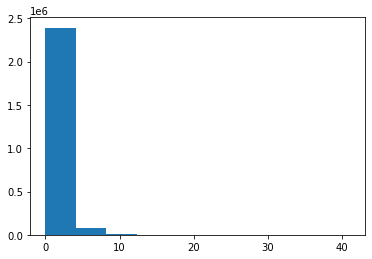

In [27]:
plt.hist(A_flatten, bins=10)